# <font color = FA0A0A> BUSINESS UNDERSTANDING </font>
Data set ini berisi cara untuk memprediksi pasien yang terdampak Kanker Paru-paru, yang dibutuhkan oleh Rumah Sakit dan Klinik, yang mempermudah tenaga medis untuk memprediksi pasien yang mempunyai Kanker Paru-paru atau tidak.

## Tentukan library yang akan digunakan

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

## <font color = FA0A0A> DATA UNDERSTANDING </font>
Data set ini memiliki 15 atribut, diantaranya sebagai berikut:
- GENDER
- AGE
- SMOKING
- YELLOW_FINGERS
- ANXIETY
- PEER_PRESSURE
- CHRONIC_DISEASE
- FATIGUE
- ALLERGY
- WHEEZING
- ALCOHOL_CONSUMING
- COUGHING
- SHORTNESS_OF_BREATH
- SWALLOWING_DIFFCULTY
- CHEST_PAIN

# <font color = FA0A0A> DATA PREPARATION </font>

In [19]:
LungCancer_data = pd.read_csv('LungCancer.csv')

In [20]:
LungCancer_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS O2 BREATH,SWALLOWING DI22ICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,2
4,2,63,1,2,1,1,1,1,1,2,1,2,2,1,1,2


<Axes: >

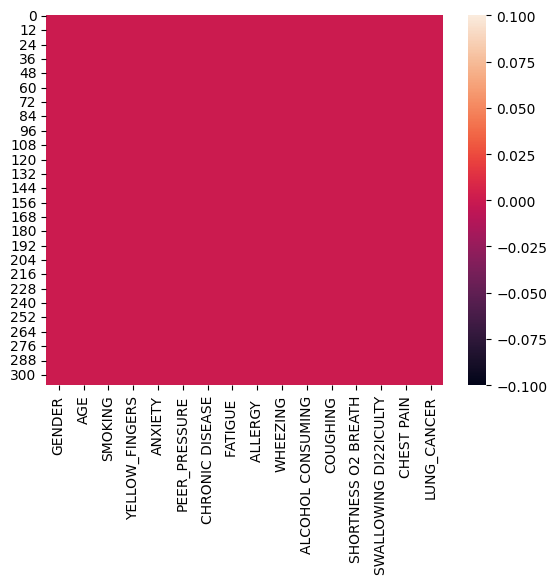

In [21]:
sns.heatmap(LungCancer_data.isnull())

<Axes: >

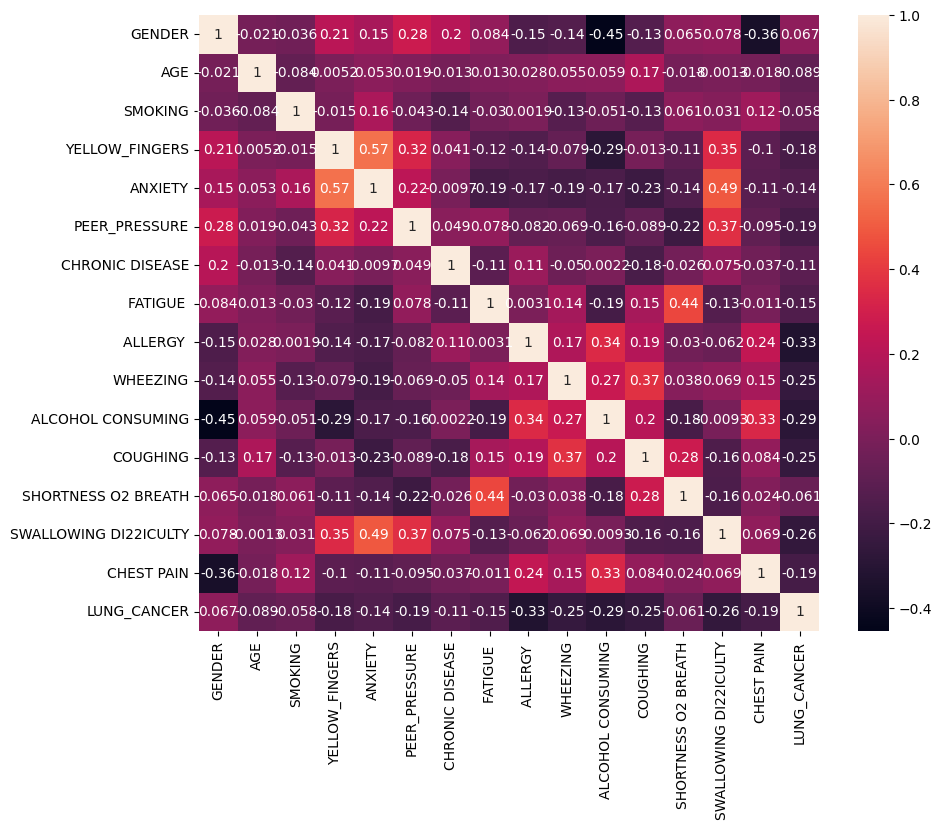

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(LungCancer_data.corr(),annot=True)

## <font color = FA0A0A> MODELING DATA </font>

# Pisahkan data atribut dengan label

In [23]:
x = LungCancer_data.drop(columns='LUNG_CANCER', axis=1)
y = LungCancer_data['LUNG_CANCER']

In [24]:
print(x)

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1   69        1               2        2              1   
1         1   74        2               1        1              1   
2         2   59        1               1        1              2   
3         1   63        2               2        2              1   
4         2   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       2   56        1               1        1              2   
305       1   70        2               1        1              1   
306       1   58        2               1        1              1   
307       1   67        2               1        2              1   
308       1   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2     

In [25]:
print(y)

0      1
1      1
2      2
3      2
4      2
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64


# Pisahkan data training dan data testing

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state= 2)

In [27]:
print(x.shape, x_train.shape, x_test.shape)

(309, 15) (247, 15) (62, 15)


# Membuat Model Training

In [28]:
model = LogisticRegression()

In [29]:
model.fit(x_train, y_train)

c:\Users\62813\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# <font color = FA0A0A> EVALUASI MODEL </font>

In [30]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score (x_train_prediction, y_train)

In [31]:
print('Akurasi Data Testing : ', training_data_accuracy)

Akurasi Data Testing :  0.951417004048583


In [32]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [33]:
print('Akurasi Data Testing :', test_data_accuracy)

Akurasi Data Testing : 0.8548387096774194


# Buatkan Model Data Prediksi

In [34]:
input_data = (1,69,1,2,2,1,1,2,1,2,2,2,2,2,2)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print('Pasien Tidak Mengidap Penyakit Kanker Paru-paru')
else :
    print('Pasien Mengidap Penyakit Kanker Paru-paru')

[1]
Pasien Mengidap Penyakit Kanker Paru-paru


c:\Users\62813\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [35]:
input_data = (2,59,1,1,1,2,1,2,1,2,1,2,2,1,2)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print('Pasien Tidak Mengidap Penyakit Kanker Paru-paru')
else :
    print('Pasien Mengidap Penyakit Kanker Paru-paru')

[1]
Pasien Mengidap Penyakit Kanker Paru-paru


c:\Users\62813\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## <font color = FA0A0A> DEPLOYMENT </font>

# Simpan Model

In [36]:
import pickle

In [37]:
filename = 'penyakit_LungCancer.sav'
pickle.dump(model, open(filename, 'wb'))

## Streamlit
https://putrinthsya-streamlit-kanker-paru-paru-stream-kanker-y419cf.streamlit.app/